In [29]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

nifty = "nifty.csv"
data = pd.read_csv(nifty, index_col="Date", parse_dates=True)

# Normalize numerical columns
scaler = MinMaxScaler()
data[['Open', 'High', 'Low', 'Close']] = scaler.fit_transform(data[['Open', 'High', 'Low', 'Close']])

# Ensure data is not shuffled while splitting
train_data, test_data = train_test_split(data, test_size=0.3, shuffle=False)

model = tf.keras.Sequential([
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])

model.compile(loss='mse', optimizer='adam')
model.fit(train_data[['Open', 'High', 'Low']], train_data['Close'], epochs=40)
predicted_closing_prices = model.predict(test_data[['Open', 'High', 'Low']])

Epoch 1/40
130/130 [==============================] - 0s 845us/step - loss: 0.0041
Epoch 2/40
130/130 [==============================] - 0s 830us/step - loss: 9.1655e-06
Epoch 3/40
130/130 [==============================] - 0s 747us/step - loss: 9.2540e-06
Epoch 4/40
130/130 [==============================] - 0s 729us/step - loss: 9.2691e-06
Epoch 5/40
130/130 [==============================] - 0s 700us/step - loss: 9.1874e-06
Epoch 6/40
130/130 [==============================] - 0s 721us/step - loss: 9.1355e-06
Epoch 7/40
130/130 [==============================] - 0s 736us/step - loss: 9.3301e-06
Epoch 8/40
130/130 [==============================] - 0s 706us/step - loss: 9.2418e-06
Epoch 9/40
130/130 [==============================] - 0s 708us/step - loss: 9.1982e-06
Epoch 10/40
130/130 [==============================] - 0s 695us/step - loss: 9.3416e-06
Epoch 11/40
130/130 [==============================] - 0s 731us/step - loss: 9.4181e-06
Epoch 12/40
130/130 [========================

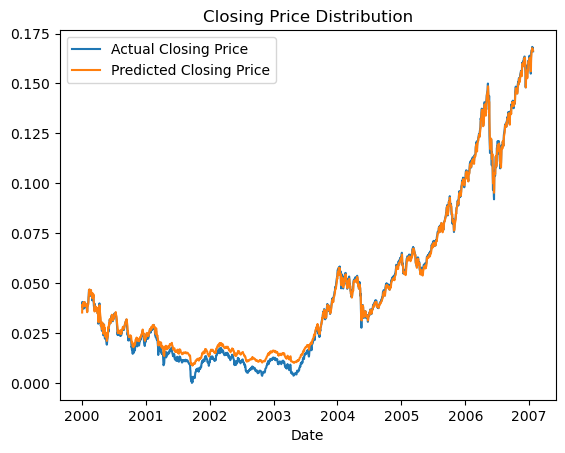


Mean Absolute Error : 0.00209


In [31]:
plt.plot(test_data.index, test_data['Close'], label='Actual Closing Price')
plt.plot(test_data.index, predicted_closing_prices, label='Predicted Closing Price')
plt.title("Closing Price Distribution")
plt.xlabel("Date")
plt.legend()
plt.show()

mae = mean_absolute_error(test_data['Close'], predicted_closing_prices)
print(f"\nMean Absolute Error : {round(mae, 5)}")